# Welcome to the geopandas homework! 
In this homework you will learn more about how to use geopandas to work with geospatial data.

In [9]:
import urllib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


### Some setup
NOTE: Here we are just  pulling in data from GitHub directly.
This can be done by specifying the url to the shapefile, but
prepending it with `/vsicurl`


In [23]:
az = gpd.read_file(
    'data/arizona_shapefile/tl_2016_04_cousub.shp')
gages = gpd.read_file(
    'data/gagesii_shapefile/gagesII_9322_sept30_2011.shp')
huc8 = gpd.read_file(
    'data/arizona_huc8_shapefile/WBDHU8.shp')

# Step 1: 
Put the `gages` geodataframe onto the same CRS as the `az` geodataframe

In [24]:
gages = gages.to_crs(az.crs) #translates gages dataframe to same coordinate system as az dataframe
#ax = az.plot(color='crimson')
#gages.plot(markersize=1, color='goldenrod', ax=ax, alpha=0.2)

# Step 2: 
The various polygons in the Arizona shapefile
are just census designated boundaries, and don't really
mean anything as far as the hydrology of Arizona. So,
let's get rid of them. In GIS-language this is called
"dissolving" the polygons. 

Your task here is to make the `az` variable be a 
geodataframe with only a single geometry.


Index(['STATEFP', 'COUNTYFP', 'COUSUBFP', 'COUSUBNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CNECTAFP', 'NECTAFP',
       'NCTADVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

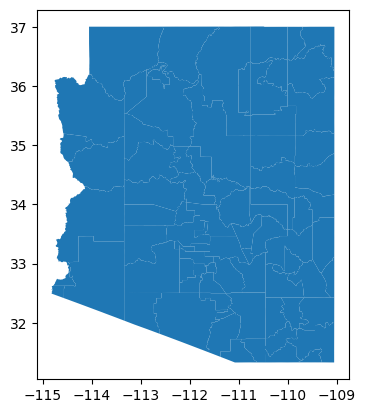

In [31]:
az.plot()
az.columns


Index(['geometry', 'STATEFP', 'COUNTYFP', 'COUSUBFP', 'COUSUBNS', 'GEOID',
       'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CNECTAFP', 'NECTAFP',
       'NCTADVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'],
      dtype='object')

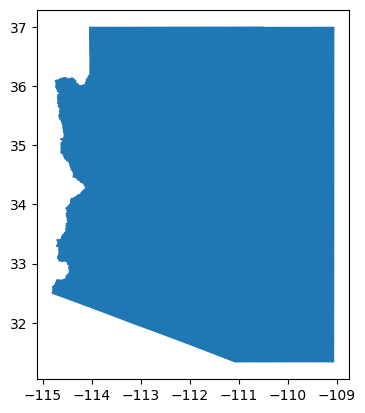

In [61]:
az_outline = az.dissolve()
az_outline.plot()
az_outline.columns

# Step 3: 
Pull out only the gages in Arizona from 
the `gages` dataset, save this as `az_gages`
In GIS-language this is called "clipping" 


In [62]:
az_gages = gages.clip(az)

az_gages['STATE'] #yep it worked

7067    AZ
7060    AZ
7061    AZ
7068    AZ
7059    AZ
        ..
6984    AZ
6985    AZ
6986    AZ
6955    AZ
6953    AZ
Name: STATE, Length: 148, dtype: object

# Step 4: 
Make a plot showing Arizona in "lightgrey"
and the locations of the gages in Arizona plotted as
"crimson" colored points.

NOTE: Calling `.plot` on a geodataframe will return 
      a new axis object which can be passed to 
      subsequent plot commands 

NOTE: You might try setting `markersize=3` or similar
      when you are plotting the gages, so that it's 
      easier to see them.


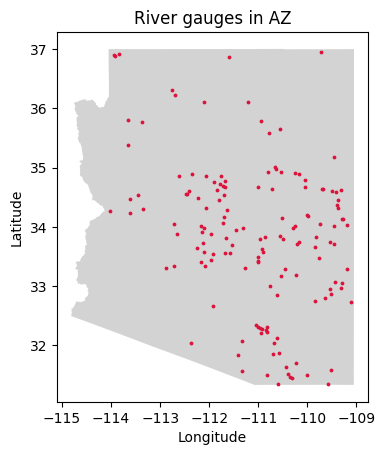

In [63]:
ax1 = az_outline.plot(color='lightgrey') #create plot names ax1
az_gages.plot(ax=ax1, color='crimson', markersize=3) #reference existing plot by name to add to it

#this alone works, but can add a title, lables, etc.
plt.title('River gauges in AZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#ending with show command gets rid of some text before the plot, but doesn't seem to be necessary
plt.show()

# Step 5: 
I also gave you a dataset of watershed
boundaries (called HUCs, for hydrologic unit code).
I gave you the "level 8" units, where a smaller unit
level means a larger spatial aggregation, and a larger
code is more fine-scaled. This is stored in the variable 
`huc8`. 

Plot the huc8 boundaries in "lightgrey", then plot 
the outline of Arizona over the top of it. Finally
plot the gages contained in Arizona again as "crimson"
points.

NOTE: To get a transparent "face color" for the Arizona
      outline set `color="none"` and `edgecolor="black"`
      inside of your second plot command.


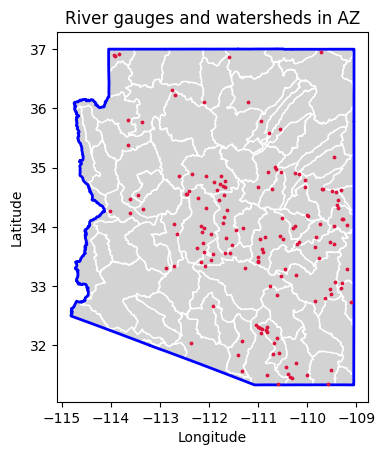

In [78]:
#modify huc 8
huc8 = huc8.to_crs(az.crs)
huc8 = huc8.clip(az)

#plot everything on top of each other
ax2 = huc8.plot(color='lightgrey', edgecolor='white')
az_outline.plot(ax=ax2, linewidth=2, edgecolor='blue', color='none')
az_gages.plot(ax=ax2, color='crimson', markersize=3)

#make it pretty
plt.title('River gauges and watersheds in AZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Step 6:  
For this step, I want you to plot the location
of the Verde river gage that we've been using as an example. 

To do this, first find the row where # the `'STANAME'` 
column of `az_gages` is equal to # the `name` variable. 
Then use that information to select out only the Verde
river gage into the variable `verde_gage`.

The resulting plot should put a big star where the 
gage location is. All other gages in Arizona will
still appear as dots.

<Axes: >

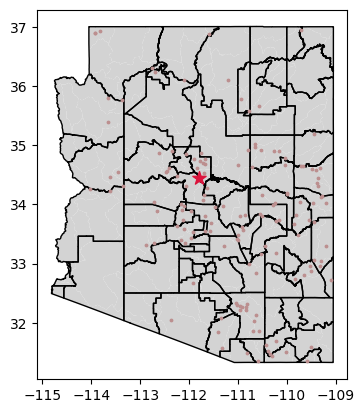

In [85]:
name = "VERDE RIVER NEAR CAMP VERDE, AZ"
verde_gage = az_gages[az_gages['STANAME'] == name]
    #need extra brackets because az_gages['STANAME'] == name just gives you true/false string not actual line of data

#could also be one line:
verde_gage = az_gages[az_gages['STANAME'] == "VERDE RIVER NEAR CAMP VERDE, AZ"]

# Plotting code, you should not have to modify
ax = huc8.plot(color='lightgrey')
az.plot(ax=ax, edgecolor='black', color="none")
az_gages.plot(ax=ax, color='rosybrown', markersize=3)
verde_gage.plot(ax=ax, color='crimson', marker='*', markersize=100)

In [79]:
az_gages.head()

,STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,HUC02,LAT_GAGE,LNG_GAGE,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990,geometry
7067,09480000,"SANTA CRUZ RIVER NEAR LOCHIEL, AZ.",Ref,WestXeric,213.3810,15,31.355378,-110.589526,AZ,yes,yes,60.0,60.0,20.0,POINT (-110.58953 31.35538)
7060,09470750,"RAMSEY CANYON NR SIERRA VISTA, AZ.",Ref,WestXeric,10.8090,15,31.446667,-110.305833,AZ,None,yes,9.0,9.0,9.0,POINT (-110.30583 31.44667)
7061,09470800,"GARDEN CANYON NEAR FORT HUACHUCA, AZ.",Ref,WestXeric,22.1517,15,31.472875,-110.347859,AZ,None,yes,20.0,20.0,15.0,POINT (-110.34786 31.47288)
7068,09481500,"SONOITA CREEK NEAR PATAGONIA, ARIZ.",Non-ref,WestXeric,540.3690,15,31.499816,-110.818142,AZ,None,None,40.0,23.0,0.0,POINT (-110.81814 31.49982)
7059,09470700,"BANNING CREEK NEAR BISBEE, AZ.",Non-ref,WestXeric,22.9662,15,31.503472,-110.005278,AZ,None,yes,8.0,8.0,8.0,POINT (-110.00528 31.50347)


# Step 7: 
Now let's combine this with our knowledge
about downloading streamflow data from USGS!

I've provided you with the functions for downloading
data that we've used in the past. You don't have to
do anything for this step.


In [ ]:

def create_usgs_url(site_no, begin_date, end_date):
    return (
        f'https://waterdata.usgs.gov/nwis/dv?'
        f'cb_00060=on&format=rdb&referred_module=sw&'
        f'site_no={site_no}&'
        f'begin_date={begin_date}&'
        f'end_date={end_date}'
    )

def open_usgs_data(site, begin_date, end_date):
    url = create_usgs_url((site), begin_date, end_date)
    response = urllib.request.urlopen(url)
    df = pd.read_table(
        response,
        comment='#',
        skipfooter=1,
        delim_whitespace=True,
        names=['agency', 'site', 'date', 'streamflow', 'quality_flag'],
        index_col=2,
        parse_dates=True
    ).iloc[2:]

    # Now convert the streamflow data to floats and
    # the index to datetimes. When processing raw data
    # it's common to have to do some extra postprocessing
    df['streamflow'] = df['streamflow'].astype(np.float64)
    df.index = pd.DatetimeIndex(df.index)
    return df


# Step 8: 
Now pull out the site id from the `verde_gage`
variable. This is contained in the `'STAID'` column, which
stands for "Station ID". Put this into the variable 
`station_id`

Success on this one should just print out the first 5
streamflow values for the Verde river near Campe Verde.


In [ ]:
begin_date = '2012-10-01'
end_date = '2024-09-30'

# TODO: Your code here
station_id = None

site = station_id.values[0]
verde_df = open_usgs_data(site, begin_date, end_date)
verde_df.head()

# Step 9: 
Now try pulling out a different gage location
using it's name and download the USGS data for the 
same time period as the `verde_df`. Put this one in
`other_gage_df`. Compare the two location's mean
streamflows by printing them out.

In [ ]:
# TODO: Your code here

# Step 10: 
From our original plots of the spatial
distribution of gages it was clear that surface
water access in Arizona is uneven. For this 
exercise I want you to count the number of gages
in Arizona for each of the HUC8 boundaries. 

To do this you'll have to iterate over the `huc8`
variable using the `huc8.iterrows()` function, which
basically loops over each row of the dataframe. 
Instead of giving you just the row, it also gives 
you the row column, which is why I have put `i, huc`
in the for loop. `i` will keep track of the row number
and `huc` will be the actual data from the row.

I've got you started on the loop, but your next step
is to "clip" from `az_gages` the "geometry" from the 
`huc`. Then, count how many gages are in this selection
by using the `len` function. Append the result of this
to the `number_gages_in_huc` list.

Finally, add a new column to the `huc8` dataframe called
`'number_gauges'` and set it equal to the `number_gages_in_huc`


In [ ]:
number_gages_in_huc = []
for i, huc in huc8.iterrows():
    # TODO: Your code here
    clipped_gages = None
    n_gages = None
    number_gages_in_huc.append(n_gages)

# TODO: Your code here

# Step 11: 
Finally, plot the number of gages in
each HUC - and don't forget to set `add_legend=True`!
Use the colormap "Blues", and also plot the Arizona
outline on top


In [ ]:
# TODO: Your code here

# CONGRATULATIONS, you're finished!